In [8]:
from collections import  defaultdict

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import torch

import pyro
from pyro import poutine
import pyro.distributions as dist
from pyro.infer import SVI, TraceEnum_ELBO
from pyro.infer.autoguide import AutoDelta, AutoDiagonalNormal
from pyro.optim import Adam

In [2]:
%load_ext autoreload
%autoreload 2
import synthesize_n400 as syn

In [27]:
def synthesize_dataset(size, level="word"):
    X_word, X_phon, y = syn.sample_dataset_with_phons(size)
    X = X_word if level == "word" else X_phon
    
    epochs_df = syn.dataset_to_epochs(X, y)
    merged_df = pd.merge(epochs_df, X[["surprisal"]],
                         left_index=True, right_index=True)
    
    X = merged_df.surprisal.values
    y = (merged_df.value_N400 - merged_df.baseline_N400).values
    
    X = torch.tensor(X).unsqueeze(1)
    y = torch.tensor(y)
    
    return X, y

In [28]:
X, y = synthesize_dataset(10)

  0%|          | 0/10 [00:00<?, ?it/s]/home/pyromancer/workspace/shared/synthesize_n400.py:130: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  acc_X_phon = X if acc_X_phon is None else acc_X_phon.append(X)
/home/pyromancer/workspace/shared/synthesize_n400.py:130: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  acc_X_phon = X if acc_X_phon is None else acc_X_phon.append(X)
/home/pyromancer/workspace/shared/synthesize_n400.py:130: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  acc_X_phon = X if acc_X_phon is None else acc_X_phon.append(X)
/home/pyromancer/workspace/shared/synthesize_n400.py:130: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  a

/home/pyromancer/workspace/shared/synthesize_n400.py:130: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  acc_X_phon = X if acc_X_phon is None else acc_X_phon.append(X)
/home/pyromancer/workspace/shared/synthesize_n400.py:130: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  acc_X_phon = X if acc_X_phon is None else acc_X_phon.append(X)
/home/pyromancer/workspace/shared/synthesize_n400.py:130: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  acc_X_phon = X if acc_X_phon is None else acc_X_phon.append(X)
/home/pyromancer/workspace/shared/synthesize_n400.py:130: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  acc_X_phon = X if acc_X_phon is None el

 40%|████      | 4/10 [00:01<00:02,  2.02it/s]/home/pyromancer/workspace/shared/synthesize_n400.py:130: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  acc_X_phon = X if acc_X_phon is None else acc_X_phon.append(X)
/home/pyromancer/workspace/shared/synthesize_n400.py:130: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  acc_X_phon = X if acc_X_phon is None else acc_X_phon.append(X)
/home/pyromancer/workspace/shared/synthesize_n400.py:130: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  acc_X_phon = X if acc_X_phon is None else acc_X_phon.append(X)
/home/pyromancer/workspace/shared/synthesize_n400.py:130: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat inst

/home/pyromancer/workspace/shared/synthesize_n400.py:130: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  acc_X_phon = X if acc_X_phon is None else acc_X_phon.append(X)
/home/pyromancer/workspace/shared/synthesize_n400.py:130: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  acc_X_phon = X if acc_X_phon is None else acc_X_phon.append(X)
/home/pyromancer/workspace/shared/synthesize_n400.py:130: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  acc_X_phon = X if acc_X_phon is None else acc_X_phon.append(X)
/home/pyromancer/workspace/shared/synthesize_n400.py:130: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  acc_X_phon = X if acc_X_phon is None el

/home/pyromancer/workspace/shared/synthesize_n400.py:130: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  acc_X_phon = X if acc_X_phon is None else acc_X_phon.append(X)
/home/pyromancer/workspace/shared/synthesize_n400.py:130: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  acc_X_phon = X if acc_X_phon is None else acc_X_phon.append(X)
/home/pyromancer/workspace/shared/synthesize_n400.py:130: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  acc_X_phon = X if acc_X_phon is None else acc_X_phon.append(X)
/home/pyromancer/workspace/shared/synthesize_n400.py:130: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  acc_X_phon = X if acc_X_phon is None el

100%|██████████| 176/176 [00:00<00:00, 480.97it/s]


In [29]:
X[:5], y[:5]

(tensor([[7.0695],
         [7.8861],
         [7.1047],
         [6.2142],
         [7.8846]], dtype=torch.float64),
 tensor([-6.5979, -8.5710, -6.5150, -6.4600, -9.9378], dtype=torch.float64))

In [30]:
def model(X, y):
    coef = pyro.sample('coef', dist.Normal(0., 2.))

    with pyro.plate('data', X.shape[0]):
        pyro.sample('obs', dist.Normal(coef * X[:, 0], 0.1), obs=y)

In [31]:
def init_loc_fn(site):
    if site["name"] == "coef":
        return 0
    raise ValueError(site["name"])

def initialize(X, y, seed, optim, elbo):
    global global_guide, svi
    pyro.set_rng_seed(seed)
    pyro.clear_param_store()
#     global_guide = AutoDelta(poutine.block(model, expose=['coef']),
#                              init_loc_fn=init_loc_fn)
    global_guide = AutoDiagonalNormal(model)
    svi = SVI(model, global_guide, optim, loss=elbo)
    return svi.loss(model, global_guide, X, y)

In [32]:
optim = pyro.optim.Adam({'lr': 0.1, 'betas': [0.8, 0.99]})
elbo = TraceEnum_ELBO()

# Choose the best among 100 random initializations.
X = torch.tensor(X)
y = torch.tensor(y)
loss, seed = min((initialize(X, y, seed, optim, elbo), seed) for seed in range(100))
initialize(X, y, seed, optim, elbo)
print('seed = {}, initial_loss = {}'.format(seed, loss))

/tmp/ipykernel_64/4214504297.py:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X = torch.tensor(X)
/tmp/ipykernel_64/4214504297.py:6: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y = torch.tensor(y)
/opt/conda/lib/python3.9/site-packages/pyro/infer/traceenum_elbo.py:355: UserWarning: TraceEnum_ELBO found no sample sites configured for enumeration. If you want to enumerate sites, you need to @config_enumerate or set infer={"enumerate": "sequential"} or infer={"enumerate": "parallel"}? If you do not want to enumerate, consider using Trace_ELBO instead.
  warnings.warn(


seed = 98, initial_loss = 28475.100370071552


In [33]:
# Register hooks to monitor gradient norms.
gradient_norms = defaultdict(list)
for name, value in pyro.get_param_store().named_parameters():
    value.register_hook(lambda g, name=name: gradient_norms[name].append(g.norm().item()))

In [34]:
losses = []
for i in range(200):
    loss = svi.step(X, y)
    losses.append(loss)
    print('.' if i % 100 else '\n', end='')


...................................................................................................
...................................................................................................

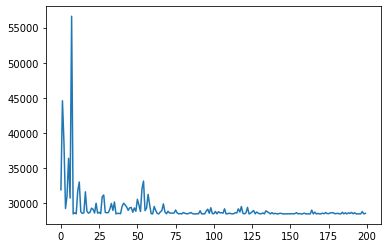

In [35]:
plt.plot(losses)

In [36]:
global_guide.requires_grad_(False)

for name, value in pyro.get_param_store().items():
    print(name, pyro.param(name))

AutoDiagonalNormal.loc Parameter containing:
tensor([-0.9803])
AutoDiagonalNormal.scale tensor([0.0082])
